<a href="https://colab.research.google.com/github/LAVANYAVARANASI-123/Google-Cloud-Jam-Module-7/blob/main/NLPfinalexternal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

exercise 1

Demonstrate Noise Removal for any textual data and remove regular
expression pattern such as hash tag from textual data

In [8]:
import re
def noise_removal(text):
  stop_words=['this','is','a']
  clean_text=text
  for word in stop_words:
    pattern=r'\b{}\b'.format(word)
    clean_text=re.sub(pattern,' ',clean_text)
  hash_tag_removal=re.sub(r'#\w+\s|@\w+\s|\s',' ',text)
  return clean_text,hash_tag_removal
text="this @code is very #easy to  do"
clean_text,hash_tag_removal=noise_removal(text)
print(text)
print(clean_text)
print(hash_tag_removal)


this @code is very #easy to  do
  @code   very #easy to  do
this  is very  to  do


exercise 2

Perform lemmatization and stemming using python library nltk

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()
text="the quick brown foxes jumped over lazy a dog"
def toke_stem(text):
  tokens=word_tokenize(text)
  stemm=[porter.stem(word) for word in tokens]
  return ' '.join(stemm)
def toke_lemm(text):
   tokens=word_tokenize(text)
   lemm=[lemmatizer.lemmatize(word) for word in tokens]
   return ' '.join(lemm)
stemmed=toke_stem(text)
lemmatized=toke_lemm(text)
print(text)
print(tokens)
print(f"\n the stemmed text is : {stemmed}")
print("\n the lemmatized text is: ", lemmatized ,"\n")


the quick brown foxes jumped over lazy a dog
['the', 'quick', 'brown', 'foxes', 'jumped', 'over', 'lazy', 'a', 'dog']

 the stemmed text is : the quick brown fox jump over lazi a dog

 the lemmatized text is:  the quick brown fox jumped over lazy a dog 



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


exercise-3

Demonstrate object standardization such as replacing social media slangs from
a text

In [31]:
slangs_map={
    'lol':'laugh a lot',
    'hlo':'hello',
     'omg':'oh my god',
     'tq':'thank you'
}
def mapp (text,slangs_map):
  for slangs,standard in slangs_map.items():
    text=text.replace(slangs,standard)
  return text
mapped=mapp(text,slangs_map)
text='omg the movie you suggested was lol tq for it, hlo again'
print(text)
print(mapped)

omg the movie you suggested was lol tq for it, hlo again
oh my god the movie you suggested was laugh a lot thank you for it, hello again


exercise-4

Perform the part of speech tagging on any textual data.

In [34]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
def pos_tagger(text):
  tokens=word_tokenize(text)
  pos_tagg=pos_tag(tokens)
  return pos_tagg
pos_tagged=pos_tagger(text)
text="the quick brown foxes jumped over lazy a dog"
print(f'the original text is : {text}')
print('\n the pos tags for words are {}'.format(pos_tagged)+"\n")


the original text is : the quick brown foxes jumped over lazy a dog

 the pos tags for words are [('the', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('foxes', 'NNS'), ('jumped', 'VBD'), ('over', 'IN'), ('lazy', 'FW'), ('a', 'DT'), ('dog', 'NN')]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


exercise-5

To implement topic modeling using Latent Dirichlet Allocation (LDA) in Python

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Sample data
documents = [
    'I love programming in Python. Python is great for data science.',
    'Data science and machine learning are fascinating fields.',
    'Python and R are popular languages for data science.',
    'Machine learning can be applied in various domains.',
    'Deep learning is a subset of machine learning.'
]

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer()
lda = LatentDirichletAllocation(n_components=2, random_state=0)
no_top_words = 5

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Split text into words and remove stop words
    words = [word for word in text.split() if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Preprocess each document
processed_documents = [preprocess_text(doc) for doc in documents]

# Vectorizing the text data
X = vectorizer.fit_transform(processed_documents)

# Fitting the LDA model
lda.fit(X)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying the top words in each topic
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

# Get the topic distribution for each document
topic_assignments = lda.transform(X)

# Assign each document to the topic with the highest probability
document_topics = topic_assignments.argmax(axis=1)

# Display the document-topic assignments
for i, topic in enumerate(document_topics):
    print(f"Document {i + 1} is assigned to Topic {topic + 1}")


Topic 1:
python science data learning machine
Topic 2:
learning machine various domain applied
Document 1 is assigned to Topic 1
Document 2 is assigned to Topic 1
Document 3 is assigned to Topic 1
Document 4 is assigned to Topic 2
Document 5 is assigned to Topic 1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


exercise-6

a) To demonstrate Term Frequency – Inverse Document Frequency (TF – IDF)
using python

In [6]:
#a. Demonstrate Term Frequency – Inverse Document Frequency (TF – IDF) using python
import numpy as np
import pandas as pd
corpus=["data science is one of the most important fields of science",
    "this is one of the best data science courses",
    "data scientists analyze data"]
words_set=set()
for doc in corpus:
  words=doc.split(' ')
  words_set=words_set.union(set(words))
n_docs=len(corpus)
n_words_set=len(words_set)
df_tf=pd.DataFrame(np.zeros((n_docs,n_words_set)),columns=list(words_set))
#tf
for i in range(n_docs):
  words=corpus[i].split(' ')
  for w in words:
    df_tf[w][i]=df_tf[w][i]+(1/len(words))
#idf
idf={}
for w in words_set:
  k=0
  for i in range(n_docs):
    if w in corpus[i].split(' '):
      k+=1
  idf[w]=np.log10(n_docs/k)
#df_tf_idf
df_tf_idf=df_tf.copy()
for w in words_set:
  for i in range(n_docs):
    df_tf_idf[w][i]=df_tf[w][i]*idf[w]
print(df_tf_idf.sort_index(axis=1))


   analyze      best   courses  data    fields  important        is      most  \
0  0.00000  0.000000  0.000000   0.0  0.043375   0.043375  0.016008  0.043375   
1  0.00000  0.053013  0.053013   0.0  0.000000   0.000000  0.019566  0.000000   
2  0.11928  0.000000  0.000000   0.0  0.000000   0.000000  0.000000  0.000000   

         of       one   science  scientists       the      this  
0  0.032017  0.016008  0.032017     0.00000  0.016008  0.000000  
1  0.019566  0.019566  0.019566     0.00000  0.019566  0.053013  
2  0.000000  0.000000  0.000000     0.11928  0.000000  0.000000  


b) To demonstrate word embeddings using word2vec

Most similar words to 'sentence': [('yet', 0.21617330610752106), ('for', 0.09310110658407211), ('one', 0.09291722625494003), ('word2vec', 0.07963486760854721), ('second', 0.06285078823566437), ('another', 0.0270574688911438), ('more', 0.016134677454829216), ('the', -0.01083916611969471), ('final', -0.027750369161367416), ('first', -0.04125341773033142)]


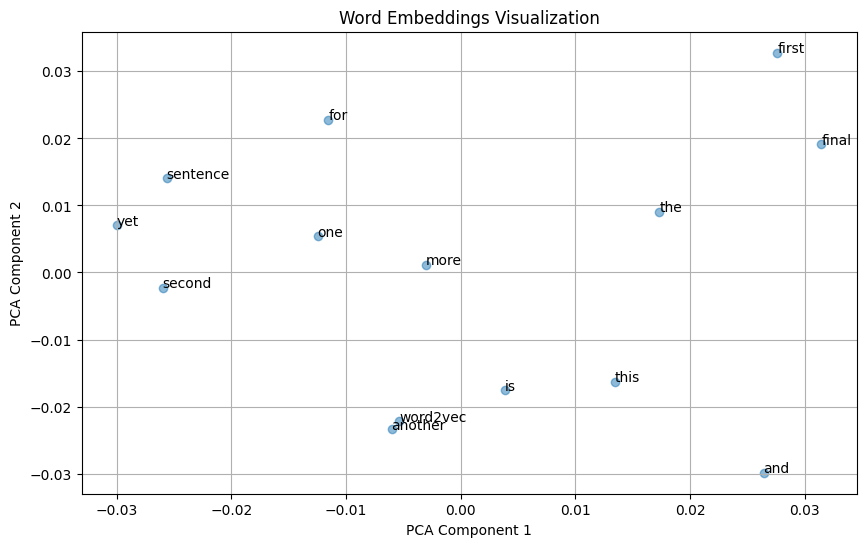

In [7]:
#b. Demonstrate word embeddings using word2vec
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample sentences
sentences = [
    ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Retrieve word vectors
word_vectors = model.wv

# Test the word vectors
similar_words = word_vectors.most_similar('sentence')
print("Most similar words to 'sentence':", similar_words)

# Visualize word embeddings using PCA
def plot_embeddings(words, vectors):
    # Fit PCA model on word vectors
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('Word Embeddings Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Get all words in the list
all_words = sum(sentences, [])
unique_words = list(set(all_words))

# Visualize embeddings for all words
word_vectors_to_visualize = [word_vectors[word] for word in unique_words]
plot_embeddings(unique_words, word_vectors_to_visualize)


exerxise-7

To implement text classification using Naïve Bayes Classifier and Text Blob library

In [8]:
#Implement Text classification using naïve bayes classifier and text blob library
import nltk
nltk.download('punkt')
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
 ('I am exhausted of this work.', 'Class_B'),
 ("I can't cooperate with this", 'Class_B'),
 ('He is my badest enemy!', 'Class_B'),
 ('My management is poor.', 'Class_B'),
 ('I love this burger.', 'Class_A'),
 ('This is an brilliant place!', 'Class_A'),
 ('I feel very good about these dates.', 'Class_A'),
 ('This is my best work.', 'Class_A'),
 ("What an awesome view", 'Class_A'),
 ('I do not like this dish', 'Class_B')]
test_corpus = [
 ("I am not feeling well today.", 'Class_B'),
 ("I feel brilliant!", 'Class_A'),
 ('Gary is a friend of mine.', 'Class_A'),
 ("I can't believe I'm doing this.", 'Class_B'),
 ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]
model = NBC(training_corpus)
print(model.classify("Their codes are amazing."))
print(model.classify("I don't like their computer."))
print(model.accuracy(test_corpus))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Class_A
Class_B
0.8333333333333334


exercise-8

Apply support vector machine for text classification

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm
training_corpus = [
('I am exhausted of this work.', 'Class_B'),
("I can't cooperate with this", 'Class_B'),
('He is my badest enemy!', 'Class_B'),
('My management is poor.', 'Class_B'),
('I love this burger.', 'Class_A'),
('This is an brilliant place!', 'Class_A'),
('I feel very good about these dates.', 'Class_A'),
('This is my best work.', 'Class_A'),
("What an awesome view", 'Class_A'),
('I do not like this dish', 'Class_B')]
test_corpus = [ ("I am not feeling well today.", 'Class_B'),
("I feel brilliant!", 'Class_A'),
('Gary is a friend of mine.', 'Class_A'),
("I can't believe I'm doing this.", 'Class_B'),
('The date was good.', 'Class_A'), ('I do not enjoy my job',
'Class_B')]
# preparing data for SVM model (using the same training_corpus, test_corpus from naive bayes example)
train_data = []
train_labels = []
for row in training_corpus:
  train_data.append(row[0])
  train_labels.append(row[1])
  test_data = []
  test_labels = []
for row in test_corpus:
  test_data.append(row[0])
  test_labels.append(row[1])
# Create feature vectors
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)
# Apply model on test data
test_vectors = vectorizer.transform(test_data)
# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels)
prediction = model.predict(test_vectors)
print(prediction)
print(classification_report(test_labels, prediction))

['Class_A' 'Class_A' 'Class_B' 'Class_B' 'Class_A' 'Class_A']
              precision    recall  f1-score   support

     Class_A       0.50      0.67      0.57         3
     Class_B       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



exercise-9

Convert text to vectors (using term frequency) and apply cosine similarity to
provide closeness among two text.

In [11]:
import math
from collections import Counter

def get_cosine(vec1, vec2):
    print(vec1.keys())
    print(vec2.keys())
    common = set(vec1.keys()) & set(vec2.keys())
    print(common)

    numerator = sum([vec1[x] * vec2[x] for x in common])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])

    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = text.split()
    return Counter(words)

text1 = 'This is an article on analytics vidhya'
text2 = 'article on analytics vidhya is about natural language processing'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

print(vector1)
print(vector2)

cosine = get_cosine(vector1, vector2)
print("Cosine Similarity:", cosine)


Counter({'This': 1, 'is': 1, 'an': 1, 'article': 1, 'on': 1, 'analytics': 1, 'vidhya': 1})
Counter({'article': 1, 'on': 1, 'analytics': 1, 'vidhya': 1, 'is': 1, 'about': 1, 'natural': 1, 'language': 1, 'processing': 1})
dict_keys(['This', 'is', 'an', 'article', 'on', 'analytics', 'vidhya'])
dict_keys(['article', 'on', 'analytics', 'vidhya', 'is', 'about', 'natural', 'language', 'processing'])
{'analytics', 'on', 'vidhya', 'is', 'article'}
Cosine Similarity: 0.629940788348712


exercise-10

Case study 1: Identify the sentiment of tweets
In this problem, you are provided with tweet data to predict sentiment on
electronic products of netizens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.45
Confusion Matrix:
 [[5 3]
 [8 4]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.38      0.62      0.48         8
    positive       0.57      0.33      0.42        12

    accuracy                           0.45        20
   macro avg       0.48      0.48      0.45        20
weighted avg       0.50      0.45      0.44        20



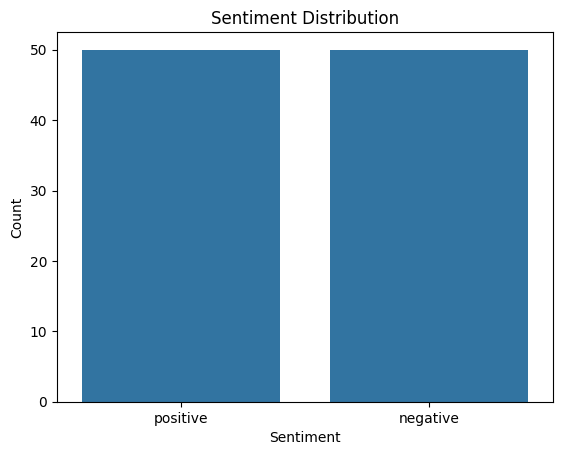

In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
tweets_df = pd.read_csv('/content/test.csv')

# Preprocess tweets
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)    # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)    # Remove hashtags
    tweet = re.sub(r'\d+', '', tweet)     # Remove numbers
    tweet = tweet.lower()                 # Convert to lowercase
    tweet = re.sub(r'[^\w\s]', '', tweet) # Remove punctuation
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
    return tweet

tweets_df['cleaned_tweet'] = tweets_df['tweet'].apply(preprocess_tweet)

# For demonstration purposes, we manually label some data
# In a real scenario, use a labeled dataset or a pre-trained model to label your data
sample_size = 100  # Adjust sample size for manual labeling
tweets_df_sample = tweets_df.sample(sample_size)
tweets_df_sample['sentiment'] = ['positive' if i % 2 == 0 else 'negative' for i in range(sample_size)]

# Split data into training and test sets
X = tweets_df_sample['cleaned_tweet']
y = tweets_df_sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot sentiment distribution
sns.countplot(x='sentiment', data=tweets_df_sample)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [15]:
import pandas as pd
data=pd.read_csv('/content/test.csv')
data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


exercise-11

In [20]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('/content/labeled_data.csv')

# Preprocess text function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower().strip()          # Convert to lowercase and strip whitespaces
    return text

# Apply preprocessing
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Use the 'class' column as the label for hate speech detection
X = df['cleaned_tweet']
y = df['class']  # Assuming 'class' indicates hate speech

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.15      0.23       290
           1       0.91      0.96      0.93      3832
           2       0.83      0.81      0.82       835

    accuracy                           0.89      4957
   macro avg       0.74      0.64      0.66      4957
weighted avg       0.87      0.89      0.87      4957



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
import pandas as pd
data=pd.read_csv('/content/labeled_data.csv')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.48      0.15      0.23       290
           1       0.91      0.96      0.93      3832
           2       0.83      0.81      0.82       835

    accuracy                           0.89      4957
   macro avg       0.74      0.64      0.66      4957
weighted avg       0.87      0.89      0.87      4957



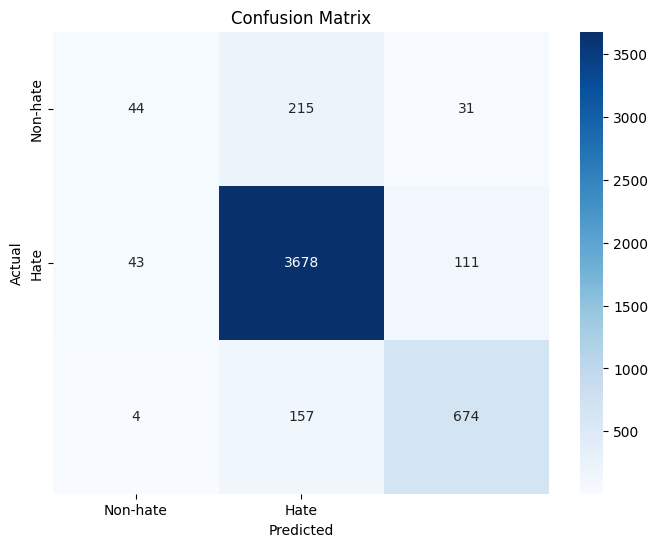

False Positive Rate: 0.83
Accuracy: 0.89


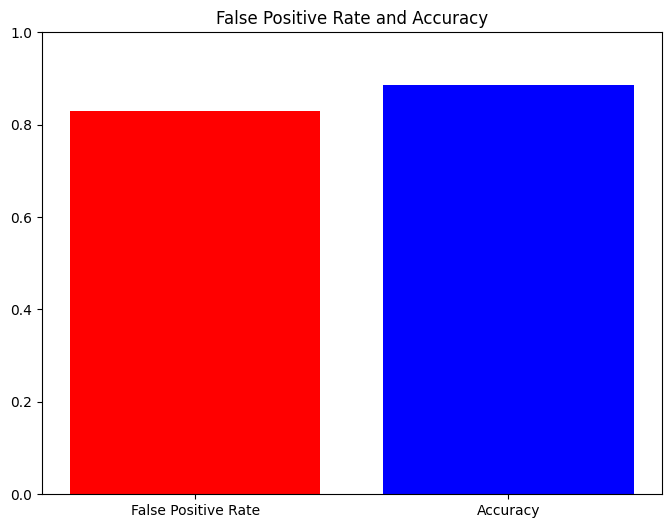

In [21]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/labeled_data.csv')

# Preprocess text function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower().strip()          # Convert to lowercase and strip whitespaces
    return text

# Apply preprocessing
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Use the 'class' column as the label for hate speech detection
X = df['cleaned_tweet']
y = df['class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-hate', 'Hate'], yticklabels=['Non-hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot False Positive rate
fp = conf_matrix[0][1] / (conf_matrix[0][1] + conf_matrix[0][0])
print(f"False Positive Rate: {fp:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot FP rate and accuracy
metrics = {'False Positive Rate': fp, 'Accuracy': accuracy}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['red', 'blue'])
plt.ylim(0, 1)
plt.title('False Positive Rate and Accuracy')
plt.show()
